In [2]:
import torch
import torch.nn as nn

In [2]:
tensor1d = torch.tensor(1)
tensor1d

tensor(1)

In [3]:
tensor_2 = torch.tensor([[1,2,3],[4,5,6]])
tensor_2.shape

torch.Size([2, 3])

In [4]:
inputs = torch.rand(6,3)
inputs

tensor([[0.7394, 0.5242, 0.5181],
        [0.8258, 0.2628, 0.6257],
        [0.6727, 0.6115, 0.1756],
        [0.0901, 0.0649, 0.3352],
        [0.5796, 0.8081, 0.9457],
        [0.5244, 0.4033, 0.9682]])

In [8]:
tensor_2.reshape(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [12]:
tensor_3 = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
tensor_3

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])

In [14]:
float_vec = torch.tensor([1.2,3.5,67.3])
float_vec.dtype

torch.float32

In [19]:
float_vec.to(torch.float64)

tensor([ 1.2000,  3.5000, 67.3000], dtype=torch.float64)

In [42]:
import torch.nn.functional as F
from torch.autograd import grad
y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad = True)
b = torch.tensor([0.0], requires_grad = True)
z = x1 * w1 + b
a = torch.sigmoid(z)

In [43]:
a

tensor([0.9183], grad_fn=<SigmoidBackward0>)

In [44]:
loss = F.binary_cross_entropy(a,y)
grad_l_w1 = grad(loss, w1, retain_graph = True)
grad_l_b = grad(loss, b, retain_graph = True)

In [46]:
grad_l_w1, grad_l_b

((tensor([-0.0898]),), (tensor([-0.0817]),))

In [47]:
loss.backward()
print(w1.grad)

tensor([-0.0898])


In [49]:
# Multilayer Perceptron
class NeuralNetwork(torch.nn.Module):
    def __init__(self,num_inputs, num_outputs):
        super().__init__()
        self.layers = torch.nn.Sequential(
            # first layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # Hidden layer
            torch.nn.Linear(30,20),
            torch.nn.ReLU(),

            #Output layer
            torch.nn.Linear(20,num_outputs)
        )
    def forward(self, x):
        logits = self.layers(x)
        return logits

In [50]:
model = NeuralNetwork(50, 2)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=2, bias=True)
  )
)

In [52]:
num_params = sum(p.numel() for p in model.parameters())
num_params

2192

In [2]:
x = torch.tensor([2.0,3.0], requires_grad = True)
y = x[0] ** 2 + x[1]**3
# y.backward()

In [5]:
y.backward()

In [8]:
print(x.grad)

tensor([ 4., 27.])


#### Sum practice

In [6]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [8]:
sum_along_rows = a.sum(dim=0, keepdim = True)  # Output: tensor([ 6, 15])
sum_along_rows

tensor([[5, 7, 9]])

### Self Attention Practice

In [7]:
inputs.shape

torch.Size([6, 3])

In [17]:
# 1. Find attention scores. First find attention with itself
query = inputs[1]
query.shape

torch.Size([3])

In [12]:
attn_scores_2 = inputs @ query

In [14]:
attn_scores_2

tensor([1.0725, 1.1425, 0.8261, 0.3012, 1.2828, 1.1448])

In [18]:
# 2. Softmax for normalization
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)
attn_weights_2

tensor([0.1778, 0.1907, 0.1389, 0.0822, 0.2194, 0.1911])

In [33]:
# 3. Find Context
context_vec_2 = torch.zeros(query.shape)
context_vec_2

tensor([0., 0., 0.])

In [36]:
attn_weights_2

tensor([0.1778, 0.1907, 0.1389, 0.0822, 0.2194, 0.1911])

In [40]:
for i,x_i in enumerate(inputs):
    print("input", inputs[i])
    print("attn_weights_2", attn_weights_2[i])
    # print(x_i)
    context_vec_2 += attn_weights_2[i] * inputs[i]

input tensor([0.7394, 0.5242, 0.5181])
attn_weights_2 tensor(0.1778)
input tensor([0.8258, 0.2628, 0.6257])
attn_weights_2 tensor(0.1907)
input tensor([0.6727, 0.6115, 0.1756])
attn_weights_2 tensor(0.1389)
input tensor([0.0901, 0.0649, 0.3352])
attn_weights_2 tensor(0.0822)
input tensor([0.5796, 0.8081, 0.9457])
attn_weights_2 tensor(0.2194)
input tensor([0.5244, 0.4033, 0.9682])
attn_weights_2 tensor(0.1911)


In [41]:
context_vec_2

tensor([0.6171, 0.4879, 0.6558])

In [29]:
context_vec = attn_weights_2 @ inputs
context_vec

tensor([0.6171, 0.4879, 0.6558])

### Scaled Dot Attention

In [46]:
torch.manual_seed(123)
d_in = 3
d_out = 2

In [51]:
# Using Weights
W_query  = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
W_key  = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
W_value  = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)

In [59]:
W_query.shape

torch.Size([3, 2])

In [61]:
inputs.shape

torch.Size([6, 3])

In [65]:
# 1. We need to embed the input vector into key and queries.
queries = inputs @ W_query
keys = inputs @ W_key

In [67]:
queries, keys

(tensor([[0.8144, 0.9564],
         [0.8623, 0.7934],
         [0.5123, 0.9740],
         [0.3442, 0.1280],
         [1.2339, 1.1113],
         [1.1266, 0.7288]]),
 tensor([[1.5360, 1.1411],
         [1.5270, 1.0671],
         [1.2233, 1.0048],
         [0.4370, 0.2578],
         [1.9833, 1.4090],
         [1.6620, 1.0922]]))

In [69]:
queries[2],keys[2]

(tensor([0.5123, 0.9740]), tensor([1.2233, 1.0048]))

In [74]:
attn_scores_2 = queries[2] @ keys.T
attn_scores_2

tensor([1.8984, 1.8217, 1.6055, 0.4750, 2.3886, 1.9154])

In [75]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
attn_weights_2

tensor([0.1798, 0.1665, 0.1341, 0.0433, 0.2935, 0.1828])

In [77]:
values = inputs @ W_value

In [78]:
context_vec_2 = attn_weights_2 @ values
context_vec_2

tensor([0.4081, 0.6692])

### Challenges

In [4]:
a = torch.rand(3,2)
b = torch.rand(2,1)
a, b

(tensor([[0.6762, 0.6671],
         [0.4886, 0.4646],
         [0.3765, 0.7933]]),
 tensor([[0.8186],
         [0.2105]]))

In [67]:
a = [[1,2,3],[4,5,6]]
len(a)

2

In [69]:
b = [[1,4],[2,5]]
len(b)

2

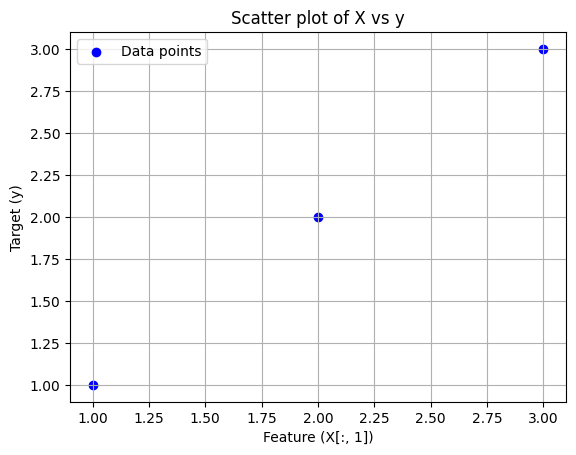

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Given data points
X = [[1, 1], [1, 2], [1, 3]]
y = [1, 2, 3]

# Convert X to a numpy array for easier slicing
X = np.array(X)

# Plotting the points
plt.scatter(X[:, 1], y, color='blue', label='Data points')

# Adding labels and title
plt.xlabel('Feature (X[:, 1])')
plt.ylabel('Target (y)')
plt.title('Scatter plot of X vs y')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
X, y

(array([[1, 1],
        [1, 2],
        [1, 3]]),
 [1, 2, 3])

In [100]:
x = X[:,1]
x

array([1, 2, 3])

In [92]:
x_bar = sum(x)/len(x)
y_bar = sum(y)/len(y)
x_bar, y_bar

(2.0, 2.0)

In [93]:
n = 0
d = 0
for i in range(len(x)):
    n += (x[i]-x_bar) * (y[i]-y_bar)
    d += (x[i]-x_bar) **2

In [97]:
beta_1 = n/d
beta_1

1.0

In [102]:
X = np.array(X)
y = np.array(y)
x_bar = np.mean(X)
y_bar = np.mean(y)
x_bar, y_bar

(1.5, 2.0)

## Deep ML Questions

In [42]:
import numpy as np
import math

In [27]:
y_true = np.array([1, 0, 1, 1, 0, 1])
y_pred = np.array([1, 0, 0, 1, 0, 1])

In [30]:
correct = 0
for i in y_true:
    if y_true[i]==y_pred[i]:
        print('true', y_true[i])
        print('pred',y_pred[i])

true 0
pred 0
true 1
pred 1
true 0
pred 0
true 0
pred 0
true 1
pred 1
true 0
pred 0


In [1]:
features = [[0.5, 1.0], [-1.5, -2.0], [2.0, 1.5]]
labels = [0, 1, 0]
weights = [0.7, -0.4]
bias = -0.1

In [31]:
sum_arr = []
for i,x in enumerate(features):
    a = weights[0]* x[0] + weights[1]*x[1]
    sum_arr.append(a)

In [38]:
sum_arr = [x+bias for x in sum_arr]
sum_arr

[-0.25000000000000006, -0.44999999999999973, 0.5999999999999999]

In [43]:
probs = [(1 / (1 + math.exp(-x))) for x in sum_arr]
probs

[0.4378234991142018, 0.389360766050778, 0.6456563062257954]

In [52]:
mse_arr = 0
for i in range(len(probs)):
    mse_arr += (labels[i] - probs[i]) **2

In [66]:
features = [[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]
labels = [1, 0, 0]
initial_weights = [0.1, -0.2]
initial_bias = 0.0
learning_rate = 0.1
epochs = 2

In [70]:
features

[[1.0, 2.0], [2.0, 1.0], [-1.0, -2.0]]

In [83]:
mul_arr = []
for i,_ in enumerate(features):
    a = features[i][0] * initial_weights[0] + features[i][1] * initial_weights[1]
    mul_arr.append(a)

In [91]:
y_pred = sum(mul_arr) + initial_bias

In [93]:
def train_neuron(features: np.ndarray, labels: np.ndarray, initial_weights: np.ndarray, initial_bias: float, learning_rate: float, epochs: int) -> (np.ndarray, float, list[float]):
    pass

In [97]:
a = torch.nn.Linear(2, 30)
a

Linear(in_features=2, out_features=30, bias=True)

## PyTorch Practice

In [100]:
# Implementing a Neural network
class NeuralNetwork(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd Hidden layer
            torch.nn.Linear(30,20),
            torch.nn.ReLU(),

            # Output Layer
            torch.nn.Linear(20, num_outputs)    
        )
    def forward(self,x):
        logits = self.layers(x)
        return logits

In [101]:
model = NeuralNetwork(50,3)

In [102]:
print(model)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


In [103]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
num_params

2213

In [109]:
model.layers[0].weight

Parameter containing:
tensor([[-0.1026, -0.1141, -0.1063,  ...,  0.0362, -0.0287, -0.1074],
        [ 0.1223, -0.0817,  0.0997,  ...,  0.1262, -0.0107,  0.1412],
        [-0.0605,  0.0228,  0.0665,  ...,  0.1171, -0.0933,  0.1199],
        ...,
        [-0.1397,  0.0794, -0.0432,  ..., -0.0482, -0.1087,  0.0439],
        [ 0.0684,  0.1236, -0.0499,  ...,  0.0914,  0.0290, -0.0244],
        [ 0.0428,  0.0028, -0.0713,  ...,  0.0075, -0.1373,  0.0537]],
       requires_grad=True)

In [3]:
# Creating a demo neural network
class SimpleNN(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.layers = nn.Sequential(
            torch.nn.Linear(num_inputs, 40),  # Fixed typo here
            torch.nn.ReLU(),
            torch.nn.Linear(40, 20),
            torch.nn.ReLU(),
            torch.nn.Linear(20, num_outputs)
        )
    
    def forward(self, x):
        logits = self.layers(x)
        return logits

In [26]:
model = SimpleNN(50, 1)
model

SimpleNN(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [27]:
x = torch.rand((1,50))
x

tensor([[0.4690, 0.8032, 0.2367, 0.3961, 0.4563, 0.4052, 0.2875, 0.9239, 0.7258,
         0.0470, 0.8585, 0.1069, 0.2802, 0.4358, 0.7210, 0.6168, 0.1942, 0.0032,
         0.9598, 0.5520, 0.7384, 0.8084, 0.1463, 0.3182, 0.9457, 0.2204, 0.5479,
         0.5234, 0.6422, 0.4450, 0.5319, 0.8429, 0.1057, 0.7249, 0.1794, 0.2899,
         0.6105, 0.4058, 0.0349, 0.0744, 0.2480, 0.9675, 0.3400, 0.0364, 0.6559,
         0.7414, 0.8372, 0.9696, 0.5269, 0.8959]])

In [28]:
out = model(x)
out

tensor([[0.2510]], grad_fn=<AddmmBackward0>)

In [4]:
y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad = True)
b = torch.tensor([0.0], requires_grad = True)

z = w1*x1 + b
a = torch.sigmoid(z)

In [10]:
import torch.nn.functional as F
from torch.autograd import grad
loss = F.binary_cross_entropy(a, y)
loss

tensor(0.0852, grad_fn=<BinaryCrossEntropyBackward0>)

In [11]:
grad_L_w1= grad(loss, w1, retain_graph = True)
grad_L_b = grad(loss, b, retain_graph =True)

In [13]:
grad_L_w1, grad_L_b

((tensor([-0.0898]),), (tensor([-0.0817]),))

In [14]:
loss.backward()
print(w1.grad)
print(b.grad)

tensor([-0.0898])
tensor([-0.0817])


In [37]:
from torch.utils.data import Dataset
class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y
    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y
    def __len__(self):
        return self.labels.shape[0]

In [38]:
X_train = torch.randn(5,2)
y_train = torch.tensor([0,0,0,1,1])
X_test = torch.randn(2,2)
y_test = torch.tensor([0,1])

In [39]:
train_ds = ToyDataset(X_train,y_train)
test_ds = ToyDataset(X_test,y_test)

In [51]:
from torch.utils.data import DataLoader
torch.manual_seed(123)

train_loader = DataLoader(
    dataset = train_ds,
    batch_size= 2,
    shuffle = True,
    num_workers = 0,
    drop_last = True
)

test_loader = DataLoader(
    dataset = test_ds,
    batch_size = 2,
    shuffle = False,
    num_workers = 0
)

In [62]:
for idx, (x, y) in enumerate(train_loader):
    logits = model(x)
    print(f"Batch {idx + 1}")
    print("Features:", x)
    print("Labels:", y)
    print("logits:", logits)
    print("-" * 30)

Batch 1
Features: tensor([[ 0.3239, -0.1085],
        [ 0.2103, -0.3908]])
Labels: tensor([0, 1])
logits: tensor([[0.0901, 0.1760],
        [0.1435, 0.1612]], grad_fn=<AddmmBackward0>)
------------------------------
Batch 2
Features: tensor([[-1.1969,  0.2093],
        [-0.9724, -0.7550]])
Labels: tensor([0, 0])
logits: tensor([[0.0843, 0.2605],
        [0.3087, 0.1609]], grad_fn=<AddmmBackward0>)
------------------------------


In [53]:
model

SimpleNN(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [70]:
# Writing a Training Loop
torch.manual_seed(123)
model = SimpleNN(num_inputs = 2, num_outputs = 2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.5)
num_epochs = 4

In [79]:
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):
        # Forward, similar to calling model(layers)
        logits= model(features)
        # Calculating Loss
        loss = F.cross_entropy(logits, labels)
        # Resetting Gradients to 0
        optimizer.zero_grad()
        # Backpropagation
        loss.backward()
        # Updating the params
        optimizer.step()

        ### Logging
        print(f"Epoch:{epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}")

Epoch:001/004 | Batch 000/002 | Train Loss: 0.41
Epoch:001/004 | Batch 001/002 | Train Loss: 0.35
Epoch:002/004 | Batch 000/002 | Train Loss: 0.39
Epoch:002/004 | Batch 001/002 | Train Loss: 0.34
Epoch:003/004 | Batch 000/002 | Train Loss: 0.22
Epoch:003/004 | Batch 001/002 | Train Loss: 0.49
Epoch:004/004 | Batch 000/002 | Train Loss: 0.37
Epoch:004/004 | Batch 001/002 | Train Loss: 0.21


In [75]:
model.eval()
with torch.no_grad():
    outputs = model(X_train)
outputs

tensor([[ 1.5385, -0.8040],
        [ 1.5077, -0.7651],
        [ 0.2704,  0.0388],
        [ 0.2799,  0.0323],
        [ 0.2096,  0.1050]])

In [76]:
torch.set_printoptions(sci_mode = False)
probas = torch.softmax(outputs, dim= 1)
probas

tensor([[0.9123, 0.0877],
        [0.9066, 0.0934],
        [0.5576, 0.4424],
        [0.5616, 0.4384],
        [0.5261, 0.4739]])

In [77]:
preds = torch.argmax(probas, dim = 1)
preds

tensor([0, 0, 0, 0, 0])